## **Support Vector Machine (SVM)**

In this notebook, we will implement linear SVM classifier.

### **Importing Libraries**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns;sns.set()

# datasets 
from sklearn.datasets import make_classification ,make_blobs

# set default color map theme for entire notebook 
sns.set_theme(style='whitegrid')

### **Model**

* So far we trained a bunch of classifiers for learning a separating hyperplane between classes. 

* **SVM** also **finds hyperplanes between the classes** - but with the **constraint** that the **margin between the classes is maximized**.

* The **hard margin SVM** assumes that the classes are **linearly separable** and none of the datapoints are within the margin or is misclassified.

![alt text](Images\svm.png)

**Formula :** y = np.sign(np.dot(w, x) + b)


### **Loss function** 

We use **hinge loss** as a loss function : `max(0,1-t)`

* It is equal to 0 when t $ \ge $ 1.

* Its derivative (slope) is equal to -1, if t < 1.

* It is not differentiable at t = -1.


![alt text](Images\loss.png)
\begin{equation} 
J(\mathbf w ,b)= \frac{1}{2} {||\mathbf w||}^2 + C \sum_l max(0, [1 - \mathbf y^{(i)} (w^T x^{(i)} +b)])   
\end{equation}

The second term of the function , **hinge loss**, is to penalize misclassification. 

* It measures the error due to misclassification (or data points being closer to the decision boundary than the margin)

* **"Hinge"** describes the fact that the error is 0 if the data point is classified correctly (and it is not close to the decision boundary).

We need to **minimize the hinge loss** function to find the **max-margin classifier**.

### **Optimization Procedure** 

We will be using gradient descent procedure for optimization.

## **Soft SVM Implementation**

In [2]:
class softSVM:

    def __init__(self, C):
        self._support_vectors = None
        self.C = C
        self.w = None
        self.b = None
        self.X = None
        self.y = None

        # n is the number of data points
        self.n = 0
        # d is the number of dimensions
        self.d = 0

    def __decision_function(self, X):
        return X.dot(self.w) + self.b

    def __cost(self, margin):
        return (1/2)*(self.w).dot(self.w) + self.C*np.sum(np.maximum(0, 1-margin))

    def __margin(self, X, y):
        return y*self.__decision_function(X)

    def fit(self, X, y, lr=1e-3, epochs=500):
        # Initialize w and b
        self.n, self.d = X.shape
        self.w = np.random.randn(self.d)
        self.b = 0

        #required only for plotting
        self.X = X
        self.y = y

        loss_array = []

        for _ in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__cost(margin)
            loss_array.append(loss)

            missclassified_pts_idx = np.where(margin < 1)[0]
            d_w = self.w - self.C * \
                y[missclassified_pts_idx].dot(X[missclassified_pts_idx])

            self.w = self.w - lr * d_w

            d_b = -self.C * np.sum(y[missclassified_pts_idx])
            self.b = self.b - lr * d_b

        self._support_vectors = np.where(self.__margin(X, y) <= 1)[0]

    def predict(self, X):
        return np.sign(self.__decision_function(X))

    def score(self, X, y):
        p = self.predict(X)
        return np.mean(y == p)

    def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y,
                    marker='o', s=100, cmap='plasma')

        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        z = self.__decision_function(xy).reshape(XX.shape)


        # plot decision boundary and margins
        ax.contour(XX, YY, z, colors=['g', 'k', 'g'], levels=[-1, 0, 1],
                linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])

        # highlight the support vectors
        ax.scatter(self.X[:, 0][self._support_vectors],
                self.X[:, 1][self._support_vectors], s=250,
                linewidth=1, facecolors='none', edgecolors='k')

        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()

### **Training Data** 

Let's first generate synthetic training data with two classes .

#### **DEMO 1:** Linearly separable data 

##### Generating artificial data points.

In [3]:
X, Y = make_blobs(n_samples=60, n_features=2, centers=[[0, 0], [6, 6]],
                  cluster_std=1,
                  random_state=12)

Y = np.where(Y == 0, -1, 1)

##### Plotting the two classes.

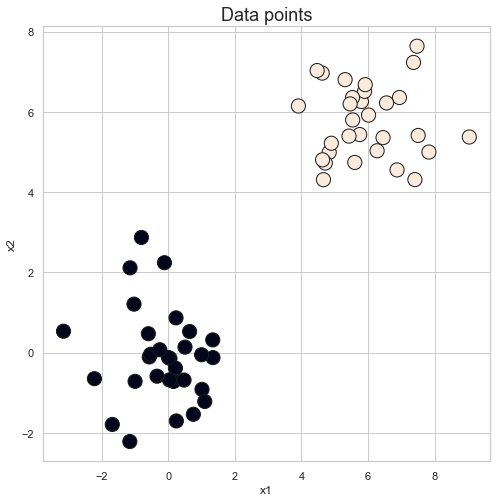

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=200, edgecolor='k')

plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)

plt.title('Data points', fontsize=18)
plt.show()

##### Training the model.

In [5]:
svm = softSVM(C=1) 
svm.fit(X,Y)

In [6]:
print(svm.w) 

[0.32020792 0.24128728]


##### Plotting the hyperplane.

In [7]:
def get_hyperplane_value(x, w, b, offset):
  return -1*(w[0]*x + b + offset) / w[1] 

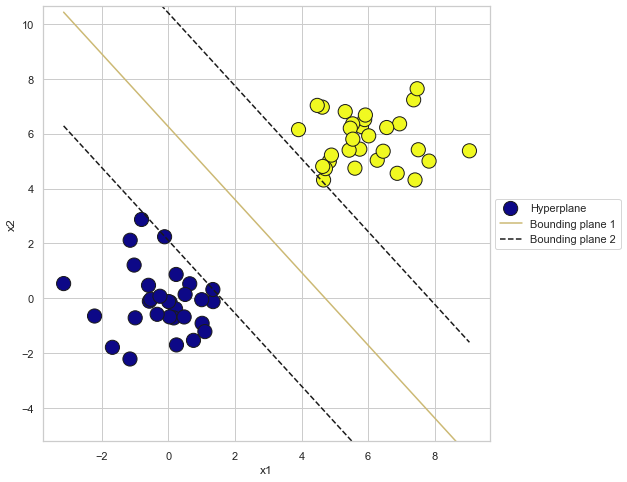

In [8]:
fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(1,1,1) 
plt.scatter(X[:,0],X[:,1],marker='o',c=Y, s =200,edgecolor = 'k',cmap='plasma') 
x0_1 = np.amin(X[:,0]) 
x0_2 = np.amax(X[:,0]) 

x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b,0)
x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b,0)

x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b,-1)
x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b,-1)

x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b,1)
x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b,1) 


ax.plot([x0_1,x0_2],[x1_1,x1_2],'y') 
ax.plot([x0_1,x0_2],[x1_1_m,x1_2_m],'k--') 
ax.plot([x0_1,x0_2],[x1_1_p,x1_2_p],'k--')

x1_min = np.amin(X[:,1]) 
x1_max = np.amax(X[:,1]) 
ax.set_ylim([x1_min -3, x1_max + 3]) 

ax.legend(['Hyperplane','Bounding plane 1', 'Bounding plane 2'], loc='center left', bbox_to_anchor=(1,0.5))

plt.xlabel('x1') 
plt.ylabel('x2') 
plt.show()

##### Prediction of a new example

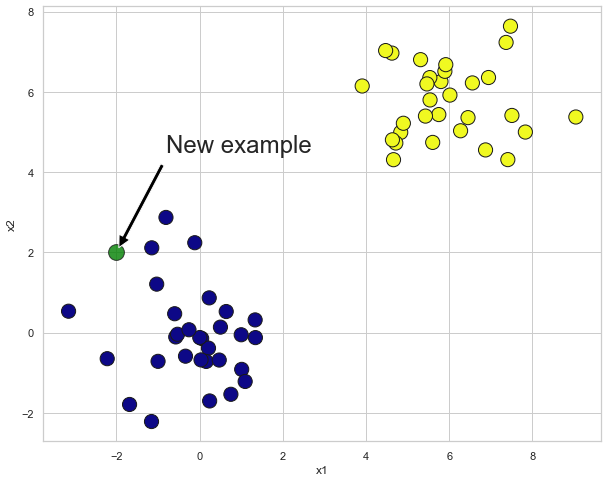

In [9]:
newExample = np.array([-2, 2])
plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            cmap='plasma', s=200, edgecolor='k')

plt.scatter(newExample[0], newExample[1], marker='o', c='green', s=250,
            edgecolor='k', alpha=0.8)

plt.annotate('New example', xy=newExample, xytext=(50, 100),
             textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), fontsize=24)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
svm.predict(newExample)

-1.0

#### **DEMO 2:** Linearly separable data with NOISE

##### Generating artificial data points.

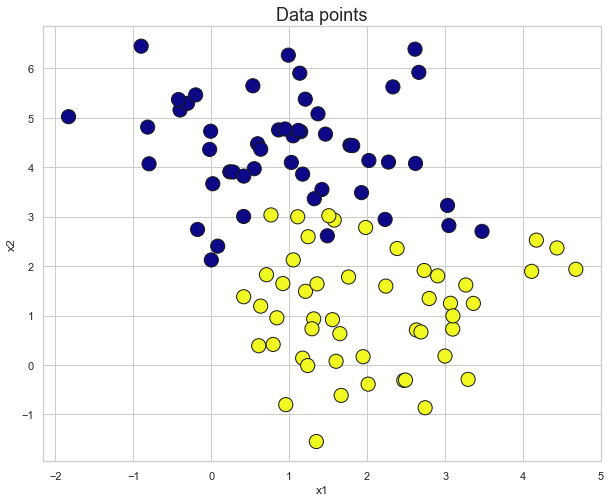

In [11]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.1)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=200, edgecolor='k', cmap='plasma')

plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)

plt.title('Data points', fontsize=18)
plt.show()

##### Training the model (1)

In [12]:
y[y==0] = -1 

svm = softSVM(C=1) 
svm.fit(X,y) 

In [13]:
print(svm.w)
print(svm.b)

[ 0.36109265 -1.04993053]
2.2119999999999655


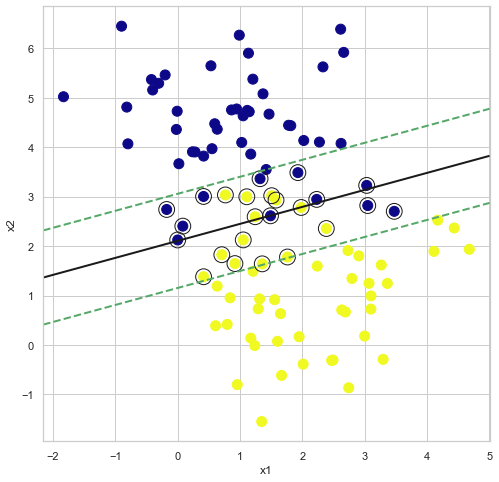

In [14]:
fig = plt.figure(figsize=(8,8)) 
svm.plot_decision_boundary()

##### Training the model (2)

In [15]:
y[y == 0] = -1
svm = softSVM(C=10)
svm.fit(X, y)

In [16]:
print(svm.w)
print(svm.b)

[ 0.35419676 -1.57047092]
3.7400000000000104


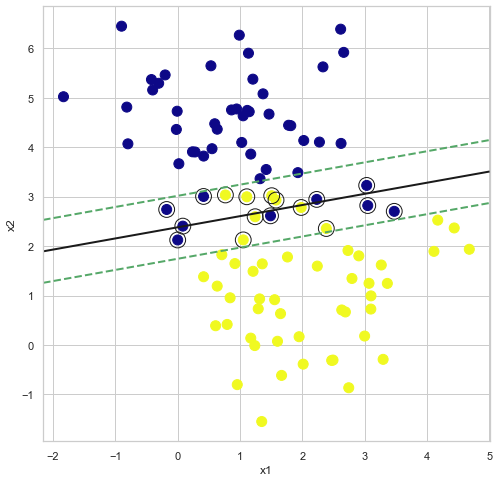

In [17]:
fig = plt.figure(figsize=(8, 8))
svm.plot_decision_boundary()

##### Training the model (3)

In [18]:
y[y == 0] = -1

svm = softSVM(C=100)
svm.fit(X, y)

In [19]:
print(svm.w, svm.b)

[  1.37418513 -10.33465967] 19.800000000000026


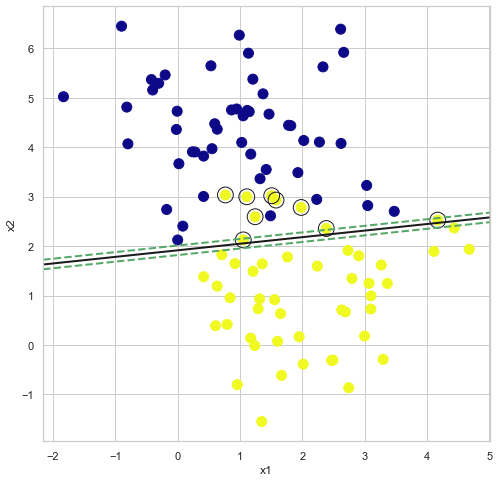

In [20]:
fig = plt.figure(figsize=(8, 8))
svm.plot_decision_boundary()

#### **DEMO 3:** Linearly non-separable data

In [21]:
from sklearn.datasets import make_circles
X, y = make_circles(500, factor=0.5, noise=0.08)
y[y == 0] = -1

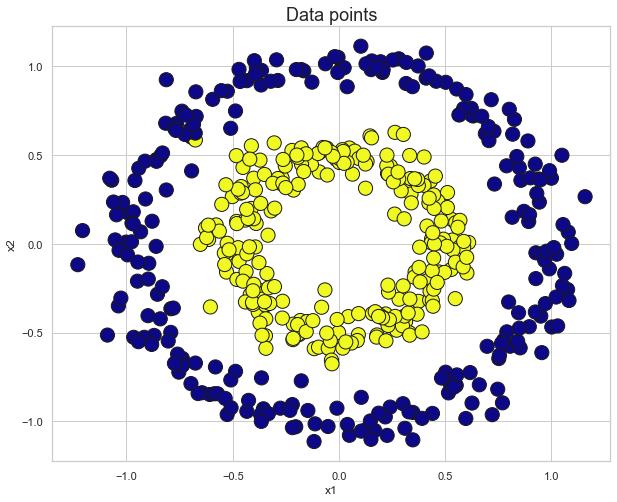

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=200, edgecolor='k', cmap='plasma')

plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.title('Data points', fontsize=18)
plt.show()

##### Training the model (1)

In [23]:
y[y == 0] = -1

svm = softSVM(C=10)
svm.fit(X, y)

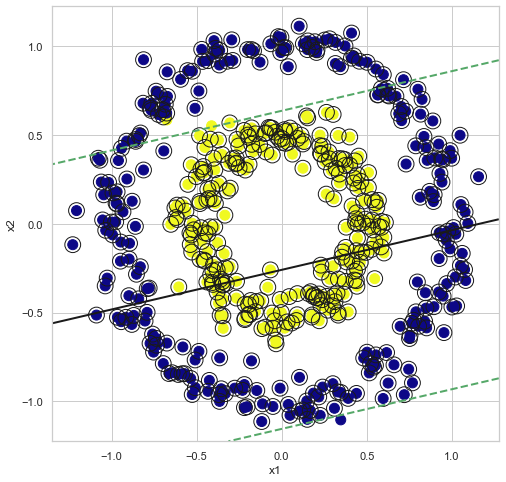

In [24]:
fig = plt.figure(figsize=(8, 8))
svm.plot_decision_boundary()

##### Training the model (2)

In [25]:
y[y == 0] = -1

svm = softSVM(C=100)
svm.fit(X, y)

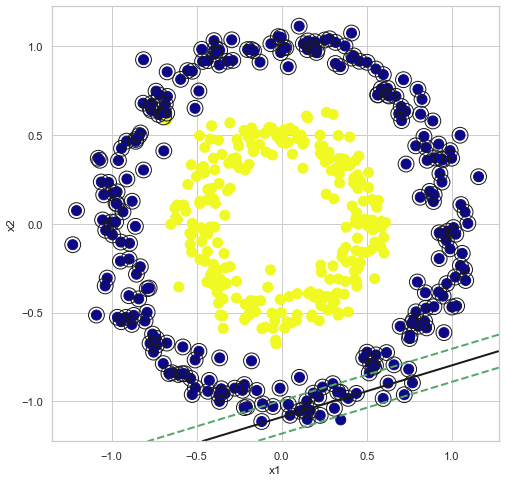

In [26]:
fig = plt.figure(figsize=(8, 8))
svm.plot_decision_boundary()

## **Kernel SVM Implementation**

We will be implementing dual problem of soft SVM by replacing the dot product between two feature vectors with the kernel function. 

The similarity of the two points is calculated with a specific kernel function. 

From $L_p$ ,the **(Wolfe) dual for soft SVM** is as follows : 

\begin{equation}
L_d(\mathbf \alpha) = \sum_{i=1}^{n} \mathbf \alpha^{(i)} - \frac{1}{2} \sum_{i=1}^{n} \sum_{k=1}^{n} \mathbf \alpha^{(i)} \mathbf \alpha^{(k)} \mathbf y^{(i)} \mathbf y^{(k)} \mathbf {x^{(i)}}^T \mathbf x^{(k)}
\end{equation}

\begin{equation} 
= \sum_{i=1}^{n} \mathbf \alpha^{(i)} - \frac{1}{2} \sum_{i=1}^{n} \sum_{k=1}^{n} (\mathbf \alpha^{(i)} \mathbf y^{(i)} \mathbf x^{(i)} ,  \mathbf \alpha^{(k)} \mathbf y^{(k)} \mathbf x^{(k)})  
\end{equation}

Subject to $∀i ∈$ 1.n : 

* 0 <= $\alpha^{(i)}$ <= $C$

* $\sum_{i=1}^{n}$ $\alpha^{(i)}$ $y^{(i)}$ = 0


It is the **concave problem** that is maximized using a solver.

In [27]:
class SVMDualProblem:

  def __init__(self, C=1.0, kernel='rbf', sigma=0.1, degree=2):
    self.C = C
    if kernel == 'poly':
      self.kernel = self._polynomial_kernel
      self.c = 1
      self.degree = degree

    else:
      self.kernel = self._rbf_kernel
      self.sigma = sigma

    self.X = None
    self.y = None
    self.alpha = None
    self.b = 0
    self.ones = None

  def _rbf_kernel(self, X1, X2):
    return np.exp(-1 * (1/self.sigma**2)*np.linalg.norm(X1[:, np.newaxis]-X2[np.newaxis, :], axis=2)**2)

  def _polynomial_kernel(self, X1, X2):
    return (self.c + X1.dot(X2.T))**self.degree

  def fit(self, X, y, lr=1e-3, epochs=100):

    self.X = X
    self.y = y

    self.alpha = np.random.random(X.shape[0])
    self.b = 0

    self.ones = np.ones(X.shape[0])

    y_iy_jk_ij = np.outer(y, y)*self.kernel(X, X)

    losses = []

    for _ in range(epochs):
      gradient = self.ones - y_iy_jk_ij.dot(self.alpha)

      self.alpha = self.alpha + lr*gradient

      self.alpha[self.alpha > self.C] = self.C
      self.alpha[self.alpha < 0] = 0

      loss = np.sum(self.alpha) - 0.5 * np.sum(
          np.outer(self.alpha, self.alpha)*y_iy_jk_ij)

      losses.append(loss)

    index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]

    b_i = y[index] - (self.alpha*y).dot(self.kernel(X, X[index]))

    # alternative code : b_1 = y[index] - np.sum((self.alpha*y).reshape(-1,1)*self.kernel(X,X[index]),axis =0)

    self.b = np.mean(b_i)
    plt.plot(losses)
    plt.title("loss per epochs")
    plt.show()

  def __decision_function(self, X):
    return (self.alpha*self.y).dot(self.kernel(self.X, X)) + self.b

  def predict(self, X):
    return np.sign(self.__decision_function(X))

  def score(self, X, y):
    y_hat = self.predict(X)
    return np.mean(y == y_hat)

  def plot_decision_boundary(self):
    plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=0.5)
    ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    z = self.__decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, z, colors=['b', 'g', 'r'], levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
    ax.scatter(self.X[:, 0][self.alpha > 0.], self.X[:, 1][self.alpha > 0.], s=50,
               linewidths=1, facecolors='none', edgecolors='k')
    plt.show()


In [28]:
import sys
sys.setrecursionlimit(2**10)

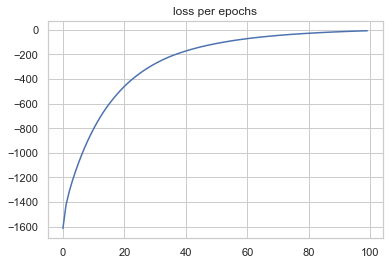

In [29]:
svm = SVMDualProblem(C=1.0,kernel='poly', degree =2) 
svm.fit(X,y,lr =1e-3) 

Training Score :  0.998


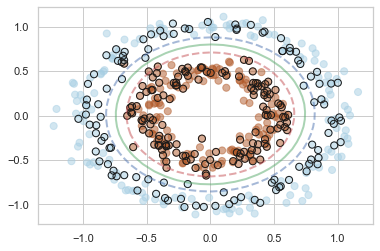

In [30]:
print('Training Score : ', svm.score(X, y))
svm.plot_decision_boundary()